In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors
import glob as glob
import seaborn as sns

I. DX codes: 
* All of A4 data is CN (1)
* For ADNI (1=NL;2=MCI;3=AD)

II. Data dictionary codes for demo data adni dictionary 
* Gender codes: male = 1 , female = 2 
* Race codes: 1=American Indian or Alaskan Native; 2=Asian; 3=Native Hawaiian or Other Pacific Islander; 4=Black or African American; 5=White; 6=More than one race; 7=Unknown
* Ethnicity codes: 1=Hispanic or Latino; 2=Not Hispanic or Latino; 3=Unknown
* Education codes: not sure 

In [10]:
a4_demo = pd.read_csv('/home/mlauber/jad2024/data_paths_and_cleaning/data/demographic_csvs/A4/a4_filtered_demo.csv')
adni_demo = pd.read_csv('/home/mlauber/jad2024/data_paths_and_cleaning/data/demographic_csvs/ADNI/adni_filtered_demo.csv')

In [11]:
print(a4_demo.columns)

Index(['RID', 'PTGENDER', 'PTAGE', 'PTETHNIC', 'PTEDUCAT', 'PTRACE', 'DX'], dtype='object')


In [12]:
print(adni_demo['PTRACE'].unique())

[5 6 4 2 7]


Creating readable figures with labels - use a dictionary to reassign labels to categorical variable names

In [13]:
#data dictionary mappings 
gender_dict = {1: 'Male', 2: 'Female'}
race_dict = {
    1: 'American Indian or Alaskan Native',
    2: 'Asian',
    3: 'Native Hawaiian or Other Pacific Islander',
    4: 'Black or African American',
    5: 'White',
    6: 'More than one race',
    7: 'Unknown'
}
ethnicity_dict = {1: 'Hispanic or Latino', 2: 'Not Hispanic or Latino', 3: 'Unknown'}

dx_dict = {1: "NC", 2:'MCI',3: "DE"}

# apply mappings to df columns
adni_demo['PTGENDER'] = adni_demo['PTGENDER'].map(gender_dict)
adni_demo['PTRACE'] = adni_demo['PTRACE'].map(race_dict)
adni_demo['PTETHNIC'] = adni_demo['PTETHNIC'].map(ethnicity_dict)
adni_demo['DX']=adni_demo['DX'].map(dx_dict)


In [14]:
print(adni_demo['DX'])

0      MCI
1       NC
2      MCI
3      MCI
4      MCI
      ... 
393    MCI
394     NC
395     NC
396     DE
397    MCI
Name: DX, Length: 398, dtype: object


In [15]:
#check for nans 
print(adni_demo['DX'].isna().any())

False


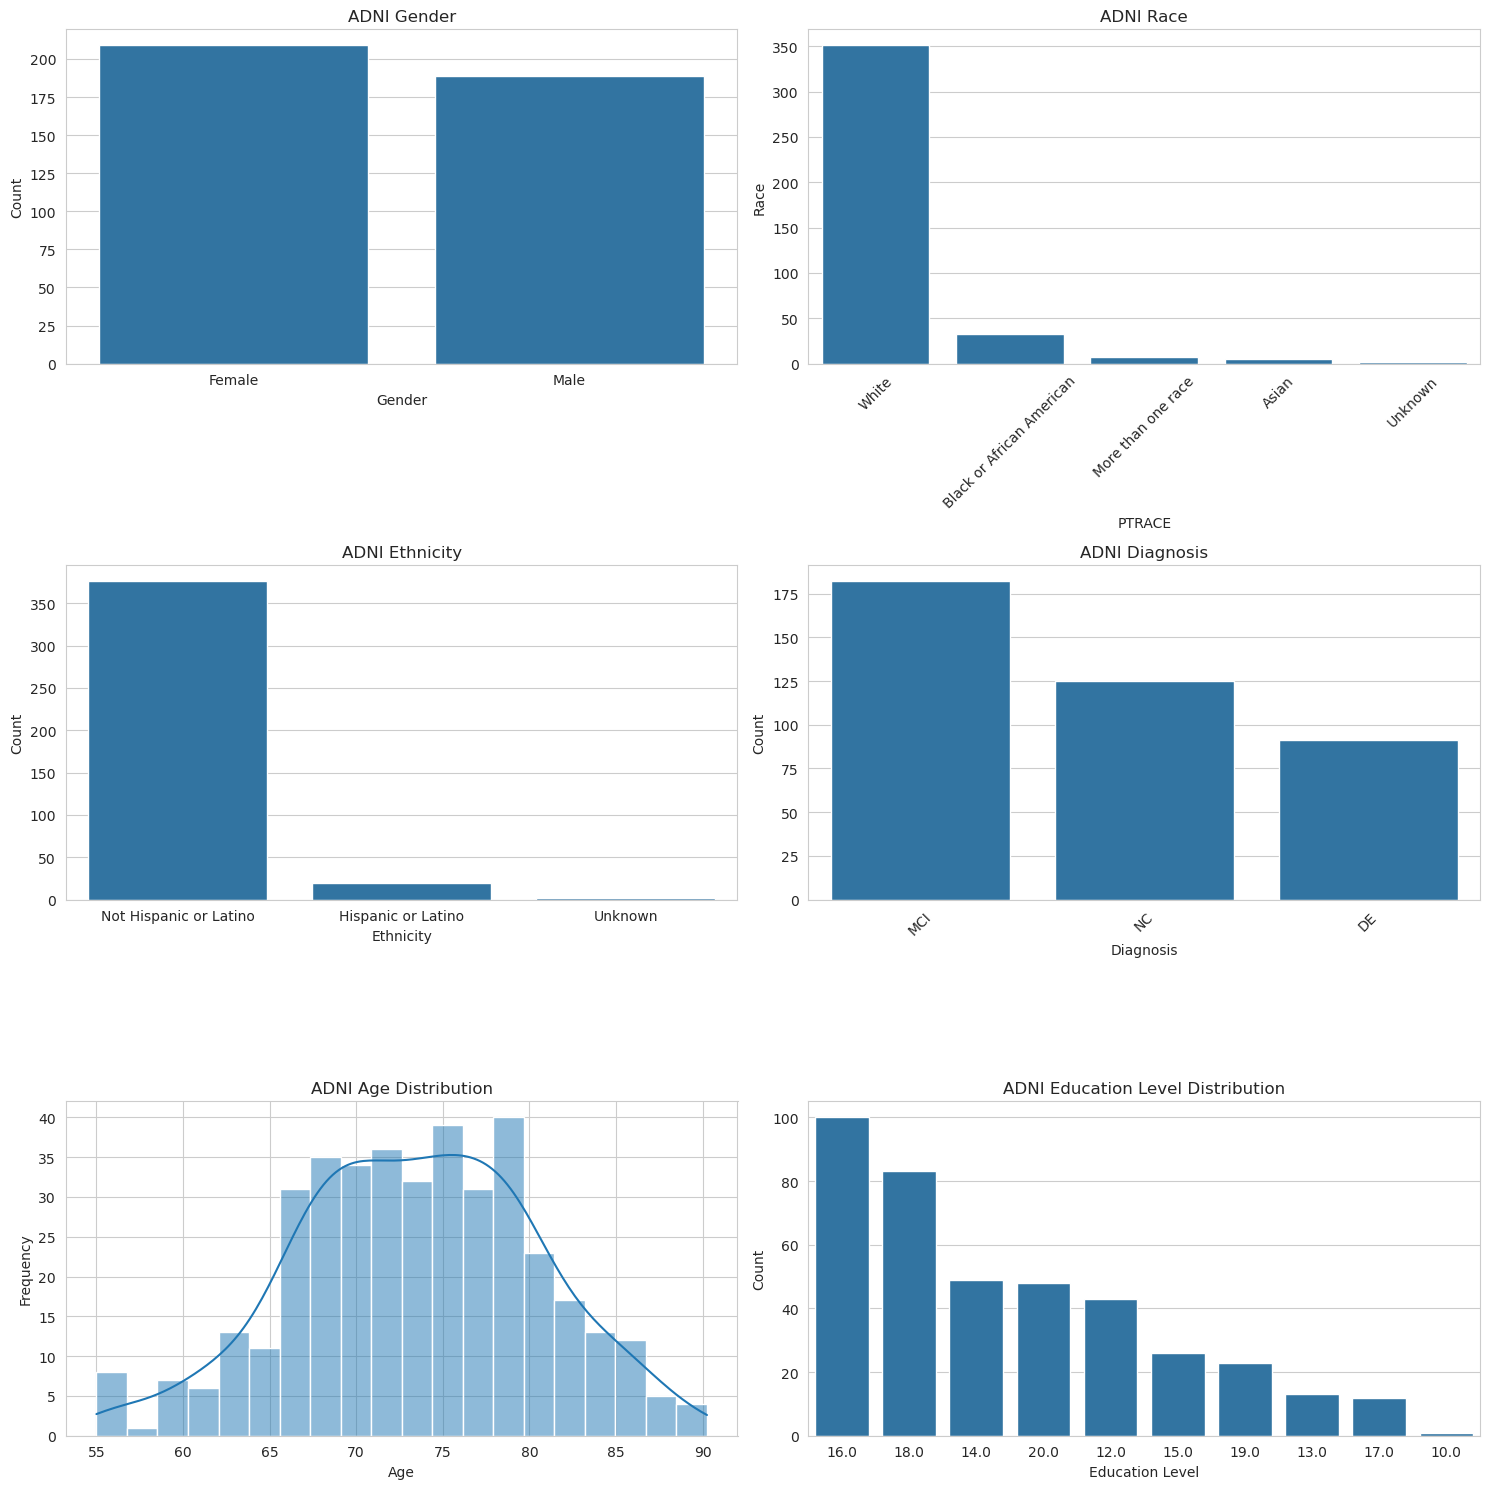

In [16]:
#more organized readable plots
sns.set_style("whitegrid")
#multiple plots in one fig
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.countplot(x='PTGENDER', data=adni_demo, order=adni_demo['PTGENDER'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('ADNI Gender')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xlabel('Gender')

sns.countplot(x='PTRACE', data=adni_demo, order=adni_demo['PTRACE'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('ADNI Race')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_ylabel('Race')
axes[0, 1].tick_params(axis='x', rotation=45)  

sns.countplot(x='PTETHNIC', data=adni_demo, order=adni_demo['PTETHNIC'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('ADNI Ethnicity')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xlabel('Ethnicity')

sns.countplot(x='DX', data=adni_demo, order=adni_demo['DX'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('ADNI Diagnosis')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Diagnosis')
axes[1, 1].tick_params(axis='x', rotation=45) 

sns.histplot(adni_demo['PTAGE'], bins=20, kde=True, ax=axes[2, 0]) 
axes[2, 0].set_title('ADNI Age Distribution')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Frequency')

sns.countplot(x='PTEDUCAT', data=adni_demo, order=adni_demo['PTEDUCAT'].value_counts().index, ax=axes[2, 1])
axes[2, 1].set_title('ADNI Education Level Distribution')
axes[2, 1].set_xlabel('Education Level')
axes[2, 1].set_ylabel('Count')
plt.tight_layout()
plt.savefig('/home/mlauber/jad2024/data_paths_and_cleaning/figures/adni/adni_demographics.pdf', dpi=300, format='pdf')
plt.show()


* Apply variable mapping 

In [17]:
print(a4_demo)

           RID  PTGENDER  PTAGE  PTETHNIC  PTEDUCAT PTRACE  DX
0    B10423472       2.0  78.25         2      19.0      5   1
1    B10693248       2.0  65.94         2      16.0      5   1
2    B10709603       1.0  74.15         2      18.0      5   1
3    B10795731       1.0  69.23         2      18.0      5   1
4    B10904689       2.0  68.21         2      13.0      5   1
..         ...       ...    ...       ...       ...    ...  ..
368  B99525373       2.0  67.00         2      20.0      5   1
369  B99649691       2.0  65.31         2      16.0      5   1
370  B99696480       2.0  74.41         2      12.0      5   1
371  B99860801       1.0  71.56         2      18.0      2   1
372  B99870985       1.0  71.32         2      14.0      5   1

[373 rows x 7 columns]


In [18]:
a4_demo = pd.read_csv('/home/mlauber/jad2024//data_paths_and_cleaning/data/demographic_csvs/A4/a4_filtered_demo.csv')

In [19]:
print(a4_demo['PTRACE'].unique())

['5' '4' '2' '6' '1:5' '4:5']


In [20]:
#replace 1:5 and 4:5 with 6  for 'more than one race' 
a4_demo['PTRACE'] = a4_demo['PTRACE'].replace(['1:5', '4:5'], '6')
a4_demo['PTRACE'] = a4_demo['PTRACE'].astype(int)
#print the unique values in the 'PTRACE' column to verify
print(a4_demo['PTRACE'].unique())

[5 4 2 6]


In [21]:
nan_rows = a4_demo[a4_demo['PTRACE'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [RID, PTGENDER, PTAGE, PTETHNIC, PTEDUCAT, PTRACE, DX]
Index: []


In [22]:
#data dictionary mappings 
a4_gender_dict = {1: 'Male', 2: 'Female'}
a4_race_dict = {
    1: 'American Indian or Alaskan Native',
    2: 'Asian',
    3: 'Native Hawaiian or Other Pacific Islander',
    4: 'Black or African American',
    5: 'White',
    6: 'More than one race',
    7: 'Unknown'
}
a4_ethnicity_dict = {1: 'Hispanic or Latino', 2: 'Not Hispanic or Latino', 3: 'Unknown'}
a4_dx_dict = {1: "NC", 2:'MCI',3: "DE"}

a4_demo['PTGENDER'] = a4_demo['PTGENDER'].map(a4_gender_dict)
a4_demo['PTRACE'] = a4_demo['PTRACE'].map(a4_race_dict)
a4_demo['PTETHNIC'] = a4_demo['PTETHNIC'].map(a4_ethnicity_dict)
a4_demo['DX']=a4_demo['DX'].map(a4_dx_dict)


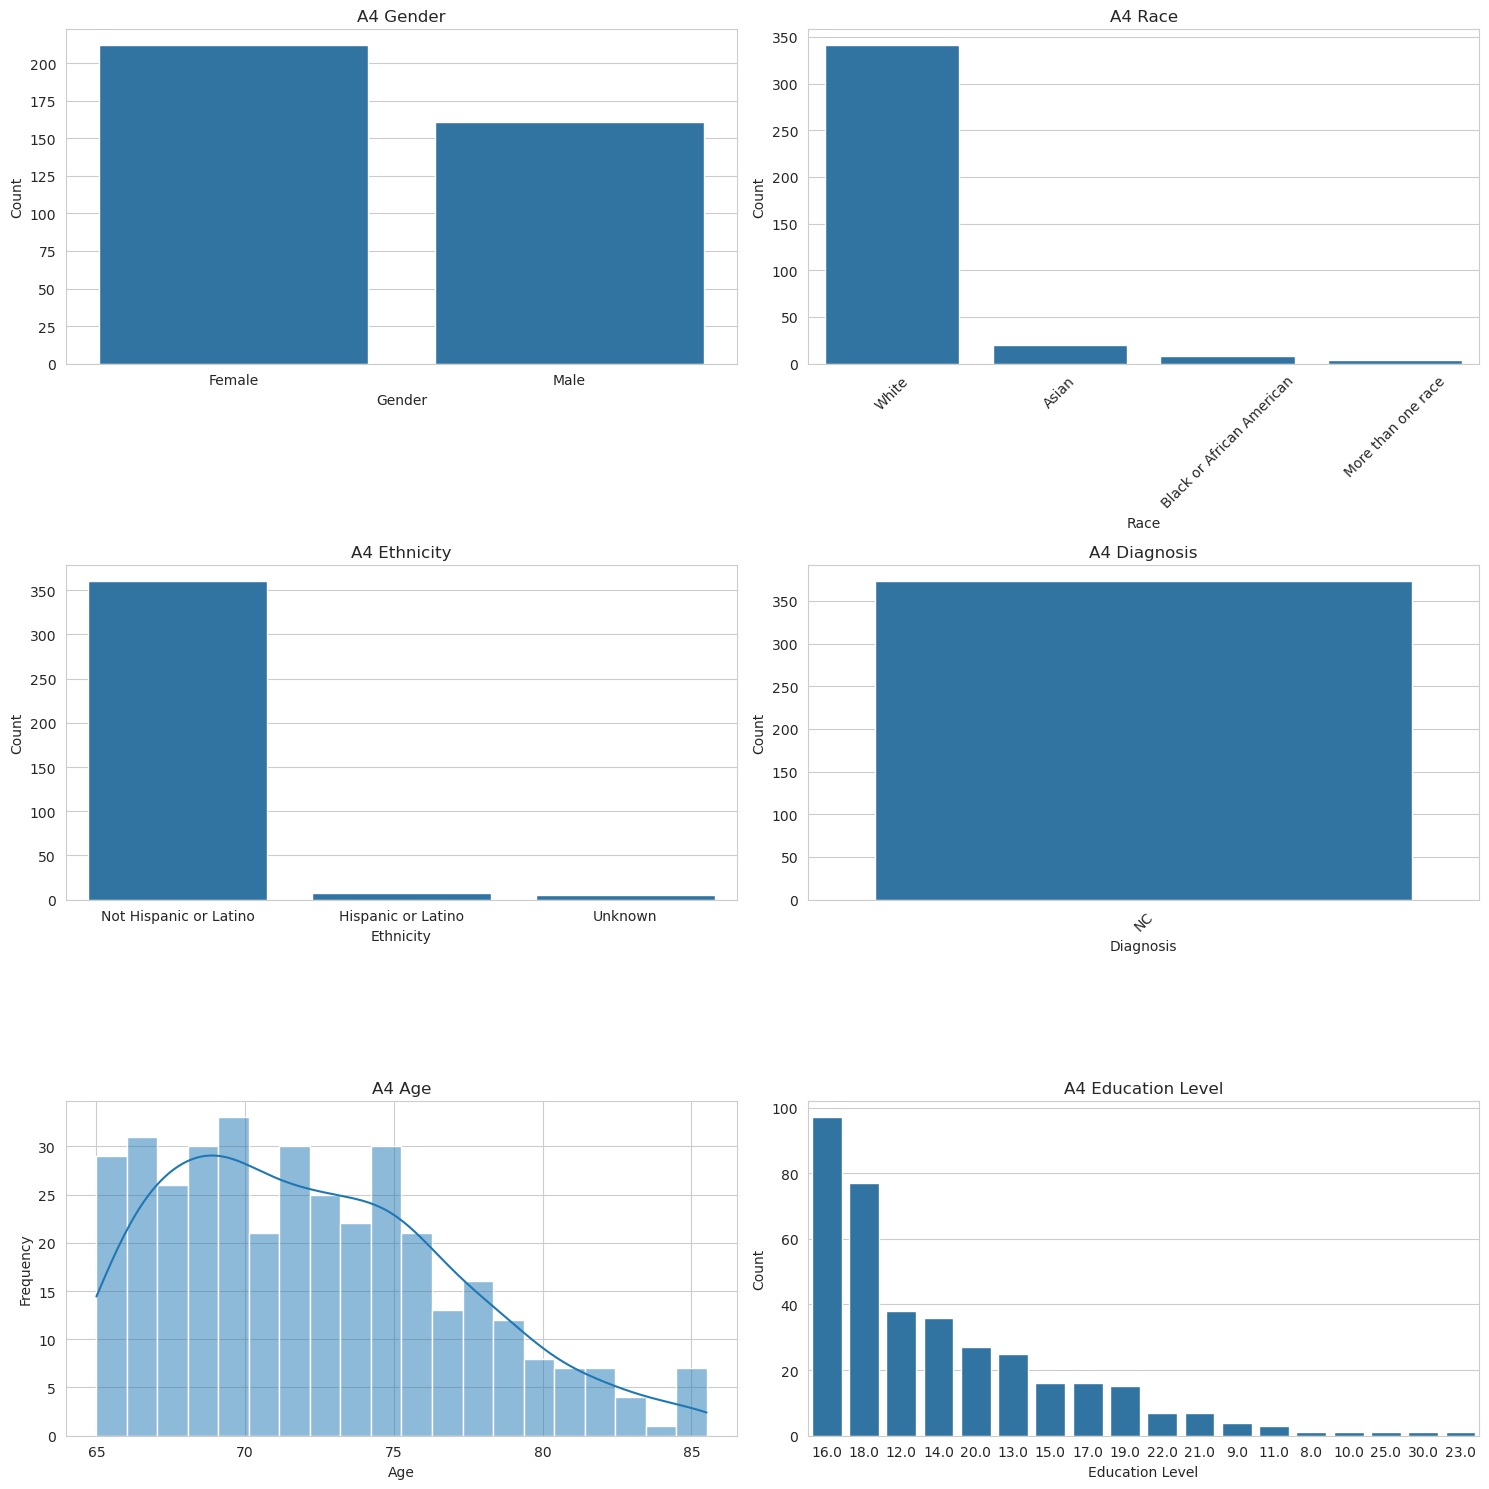

In [23]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.countplot(x='PTGENDER', data=a4_demo, order=a4_demo['PTGENDER'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('A4 Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

sns.countplot(x='PTRACE', data=a4_demo, order=a4_demo['PTRACE'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('A4 Race')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlabel('Race')
axes[0, 1].tick_params(axis='x', rotation=45)  

sns.countplot(x='PTETHNIC', data=a4_demo, order=a4_demo['PTETHNIC'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('A4 Ethnicity')
axes[1, 0].set_xlabel('Ethnicity')
axes[1, 0].set_ylabel('Count')

sns.countplot(x='DX', data=a4_demo, order=a4_demo['DX'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('A4 Diagnosis')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Diagnosis')
axes[1, 1].tick_params(axis='x', rotation=45)  

sns.histplot(a4_demo['PTAGE'], bins=20, kde=True, ax=axes[2, 0])  
axes[2, 0].set_title('A4 Age')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Frequency')

sns.countplot(x='PTEDUCAT', data=a4_demo, order=a4_demo['PTEDUCAT'].value_counts().index, ax=axes[2, 1])
axes[2, 1].set_title('A4 Education Level')
axes[2, 1].set_xlabel('Education Level')
axes[2, 1].set_ylabel('Count')
plt.tight_layout()
plt.savefig('/home/mlauber/jad2024/data_paths_and_cleaning/figures/a4/a4_demographics.pdf', dpi=300, format='pdf')
plt.show()

